In [2]:
import json
import pandas as pd
import os
import numpy as np

# 1. Load data

In [4]:
os.getcwd()
os.chdir('/Users/caden/Desktop/yelp_project/data')
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_academic_dataset_business.json',
    'yelp_academic_dataset_checkin.json',
    'yelp_academic_dataset_review.json',
    'yelp_academic_dataset_tip.json',
    'yelp_academic_dataset_user.json'
]


In [16]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)
df_business.head(2)
# np.unique(df_business['city'])

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [17]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [18]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."


In [19]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


In [20]:
with open(file_tip) as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)
df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA


In [21]:
with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)

# 2. Filter data by city and category

In [31]:
df_filtered = df_business[df_business['city'] == 'Las Vegas'].copy()
features = [u"business_id", u"name", u"categories", u"stars"]
df_select_business = df_filtered[features].copy()
df_select_business.rename(columns = {'stars': 'avg_stars'}, inplace = True)
df_select_business.head()

,business_id,name,categories,avg_stars
17,hTzcHtk4-0QJnFUbkKpd5Q,Citi Trends,"Shopping, Fashion, Department Stores",4.0
18,UwIpS9UKsPiKAv1fiEYhqg,Nevada Title And Payday Loans,"Financial Services, Check Cashing/Pay-day Loan...",1.0
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
20,YZCHr68c5aEVHz0bkq9K2g,Park Stone Pavers,"Home Services, Masonry/Concrete, Professional ...",5.0
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5


In [27]:
df_select_business.to_csv('filtered_business.csv', index = False)
# pd.read_csv('filtered_business.csv')

# 3. Filter data by date

In [32]:
df_left = df_select_business.set_index('business_id')

In [29]:
df_right = df_review.set_index('business_id')

In [33]:
df_left = df_left.join(df_right)

In [35]:
df_left = df_left.reset_index()

In [38]:
# got the data of 'Las Vegas' from 2015-01-20 to now
df_fianl = df_left[df_left['date']>'2015-01-20']

In [39]:
df_left.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng


### Got data about the business in Las Vegas last two year

# 4. Some EDA

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline

In [43]:
df_final = df_fianl.copy()

In [41]:
df_fianl.to_csv('last_2_year_restaurant_reviews_Las_Vegas.csv')

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136358 entries, 1 to 1825294
Data columns (total 12 columns):
business_id    1136358 non-null object
name           1136358 non-null object
categories     1136082 non-null object
avg_stars      1136358 non-null float64
cool           1136358 non-null int64
date           1136358 non-null object
funny          1136358 non-null int64
review_id      1136358 non-null object
stars          1136358 non-null int64
text           1136358 non-null object
useful         1136358 non-null int64
user_id        1136358 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 112.7+ MB


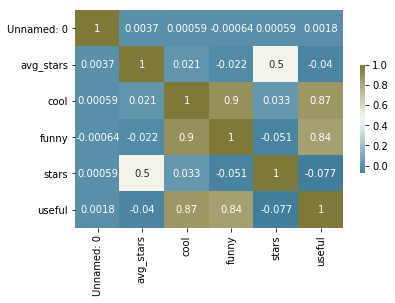

In [38]:
import seaborn as sns
corr = df_final.corr()
cmap = sns.diverging_palette(230, 80, as_cmap=True)
plt.figure()
sns.heatmap(corr, cmap = cmap, xticklabels = corr.columns, yticklabels = corr.columns, cbar_kws={"shrink": .5}, annot = True)
plt.show()

### Feature 'funny' and 'cool' have strong correlation, 'stars' and 'avg_stars' have little strong correlation

In [21]:
df_final.groupby('stars').business_id.count()

stars
1    183275
2     78360
3     97936
4    188460
5    588327
Name: business_id, dtype: int64

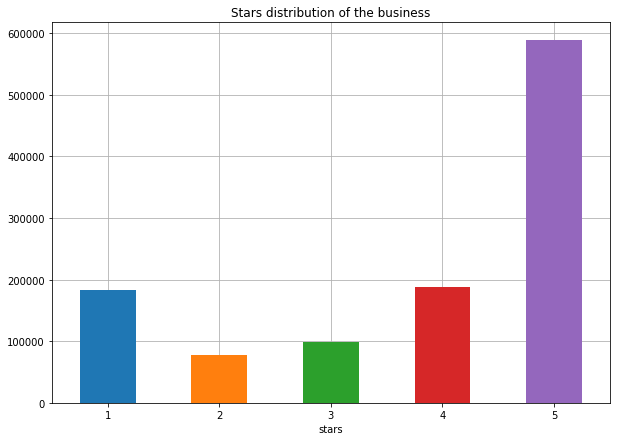

In [35]:
plt.figure(figsize = (10,7))
(df_final.groupby('stars').business_id.count()).plot.bar(grid = True, zorder = 10)
plt.xticks(rotation=0)
plt.title('Stars distribution of the business')
plt.show()

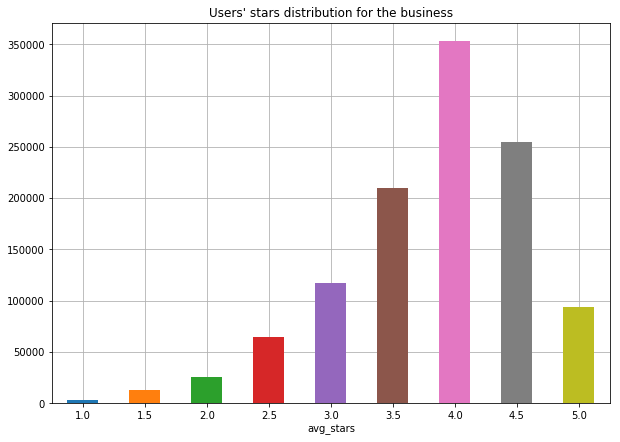

In [37]:
plt.figure(figsize = (10,7))
(df_final.groupby('avg_stars').business_id.count()).plot.bar(grid = True, zorder = 10)
plt.xticks(rotation=0)
plt.title("Users' stars distribution for the business")
plt.show()

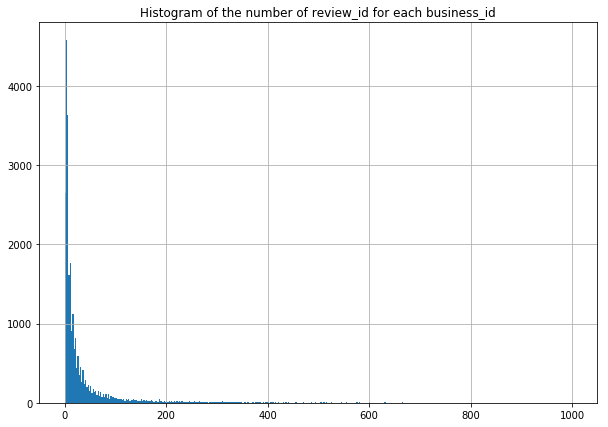

In [93]:
plt.figure(figsize = (10,7))
df_final.groupby('business_id').apply(lambda x:x['review_id'].nunique()).hist(bins = 400, range = [0, 1000])
plt.title('Histogram of the number of review_id for each business_id')
plt.show()

### Most of the business_id haven't been reviewed for too many times, this is a Power Law Distribution